In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  find out which student going to placed in future and which one not ,here out label are status

In [2]:
data=pd.read_csv(r"C:\Users\Ani\Desktop\factors-affecting-campus-placement\Placement_Data_Full_Class.csv")

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
from sklearn.preprocessing import LabelEncoder
object=LabelEncoder()
data["genders"]=object.fit_transform(data["gender"])

In [5]:

from sklearn.preprocessing import LabelEncoder
object=LabelEncoder()
data["ssc_board"]=object.fit_transform(data["ssc_b"])

from sklearn.preprocessing import LabelEncoder
object=LabelEncoder()
data["hsc_board"]=object.fit_transform(data["hsc_b"])

from sklearn.preprocessing import LabelEncoder
object=LabelEncoder()
data["hsc_side"]=object.fit_transform(data["hsc_s"])

from sklearn.preprocessing import LabelEncoder
object=LabelEncoder()
data["degree_field"]=object.fit_transform(data["degree_t"])

from sklearn.preprocessing import LabelEncoder
object=LabelEncoder()
data["workexperiance"]=object.fit_transform(data["workex"])

from sklearn.preprocessing import LabelEncoder
object=LabelEncoder()
data["specialisations"]=object.fit_transform(data["specialisation"])

from sklearn.preprocessing import LabelEncoder
object=LabelEncoder()
data["final_status"]=object.fit_transform(data["status"])


In [6]:
data.drop(["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"],axis=1,inplace=True)

In [7]:
data.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations,final_status
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,2,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,2,2,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,NaN,1,0,0,2,2,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,1


In [8]:
data.isnull().sum()

sl_no               0
ssc_p               0
hsc_p               0
degree_p            0
etest_p             0
mba_p               0
salary             67
genders             0
ssc_board           0
hsc_board           0
hsc_side            0
degree_field        0
workexperiance      0
specialisations     0
final_status        0
dtype: int64

In [9]:
#we have nan value in salary column we not need panic because there is not need of salary in my mode#l

#so we will drop the salary and sl_no  column
data.drop("salary",axis=1,inplace=True)

In [10]:
data.drop("sl_no",axis=1,inplace=True)

In [11]:
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations,final_status
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,1


In [12]:
# now we check uniqueness of each column

data["ssc_p"].unique()

array([67.  , 79.33, 65.  , 56.  , 85.8 , 55.  , 46.  , 82.  , 73.  ,
       58.  , 69.6 , 47.  , 77.  , 62.  , 63.  , 60.  , 79.  , 69.8 ,
       77.4 , 76.5 , 52.58, 71.  , 76.76, 64.  , 61.  , 87.  , 69.  ,
       51.  , 81.  , 78.  , 74.  , 49.  , 76.  , 70.89, 50.  , 75.2 ,
       54.4 , 40.89, 80.  , 60.4 , 68.  , 52.6 , 84.2 , 86.5 , 54.  ,
       83.  , 80.92, 69.7 , 75.  , 84.86, 64.6 , 56.6 , 59.  , 66.5 ,
       84.  , 81.7 , 70.  , 83.84, 59.6 , 66.  , 85.  , 52.  , 60.23,
       70.5 , 45.  , 61.08, 69.5 , 73.96, 68.2 , 60.8 , 72.  , 80.4 ,
       76.7 , 74.9 , 77.44, 77.67, 89.4 , 44.  , 75.4 , 53.  , 51.57,
       55.6 , 74.2 , 67.16, 63.3 , 67.9 , 48.  , 59.96, 63.4 , 73.24,
       77.8 , 56.28, 88.  , 78.5 , 61.8 , 65.2 , 83.96, 54.2 , 55.68,
       41.  , 83.33, 43.  , 80.6 ])

In [13]:
data["hsc_p"].unique()


array([91.  , 78.33, 68.  , 52.  , 73.6 , 49.8 , 49.2 , 64.  , 79.  ,
       70.  , 61.  , 68.4 , 55.  , 87.  , 47.  , 75.  , 66.2 , 67.  ,
       66.  , 65.  , 76.  , 60.8 , 60.  , 97.7 , 54.6 , 76.5 , 73.5 ,
       53.  , 81.  , 51.  , 78.  , 44.  , 58.  , 77.  , 63.16, 39.  ,
       73.  , 71.98, 62.  , 37.  , 73.2 , 61.12, 45.83, 66.6 , 71.4 ,
       65.58, 73.4 , 64.2 , 74.  , 78.5 , 70.29, 83.83, 64.8 , 70.4 ,
       80.  , 90.9 , 63.  , 89.83, 90.  , 57.  , 69.  , 62.5 , 82.  ,
       72.  , 50.  , 54.  , 72.8 , 40.  , 66.8 , 59.  , 71.  , 89.7 ,
       92.  , 56.  , 64.89, 65.66, 86.  , 58.66, 60.5 , 74.66, 69.4 ,
       49.  , 87.6 , 72.5 , 42.16, 67.2 , 50.83, 97.  , 71.5 , 60.33,
       62.83, 65.5 , 77.6 , 70.2 , 61.4 , 61.33, 42.  ])

In [14]:
data["degree_p"].unique()


array([58.  , 77.48, 64.  , 52.  , 73.3 , 67.25, 79.  , 66.  , 72.  ,
       61.  , 60.  , 78.3 , 65.  , 59.  , 50.  , 69.  , 65.6 , 70.  ,
       85.  , 72.23, 64.74, 78.86, 50.2 , 67.5 , 73.  , 66.4 , 81.  ,
       57.  , 80.  , 68.  , 68.4 , 56.2 , 53.  , 61.4 , 74.  , 72.11,
       66.89, 67.4 , 75.  , 67.  , 72.7 , 62.  , 71.  , 78.  , 71.72,
       70.2 , 77.5 , 71.93, 64.5 , 77.2 , 82.  , 50.8 , 54.  , 76.  ,
       63.  , 83.  , 66.6 , 64.6 , 69.6 , 69.3 , 64.33, 75.5 , 77.72,
       77.  , 69.5 , 73.43, 70.67, 71.25, 56.  , 55.  , 84.  , 59.9 ,
       60.9 , 57.5 , 77.25, 63.35, 61.26, 64.27, 64.2 , 62.8 , 64.21,
       59.79, 54.38, 69.2 , 64.8 , 56.3 , 91.  , 56.87, 77.6 ])

In [15]:
data["etest_p"].unique()

array([55.  , 86.5 , 75.  , 66.  , 96.8 , 74.28, 67.  , 91.34, 54.  ,
       62.  , 60.  , 68.  , 76.  , 72.  , 50.48, 50.  , 95.  , 55.53,
       92.  , 97.4 , 94.  , 73.35, 77.  , 52.  , 64.  , 50.89, 88.  ,
       68.44, 71.  , 58.  , 53.7 , 93.  , 65.  , 63.  , 89.  , 78.  ,
       71.2 , 87.  , 80.  , 74.  , 57.6 , 61.6 , 59.  , 68.5 , 61.  ,
       89.69, 68.92, 68.71, 79.  , 70.  , 95.5 , 86.  , 84.27, 69.  ,
       86.04, 82.  , 84.  , 78.74, 53.88, 95.46, 93.91, 56.39, 57.5 ,
       85.  , 57.2 , 72.15, 96.  , 97.  , 82.66, 73.  , 55.67, 80.4 ,
       55.5 , 81.2 , 90.  , 74.4 , 55.6 , 56.  , 83.  , 57.  , 64.25,
       98.  , 56.15, 93.4 , 57.63, 75.2 , 53.04, 58.1 , 54.48, 58.06,
       63.79, 87.5 , 75.5 , 95.65, 59.32, 87.55, 61.28, 88.56, 92.66,
       91.  ])

In [16]:

data["mba_p"].unique()

array([58.8 , 66.28, 57.8 , 59.43, 55.5 , 51.58, 53.29, 62.14, 61.29,
       52.21, 60.85, 63.7 , 65.04, 68.63, 54.96, 64.66, 62.54, 67.28,
       64.08, 77.89, 56.7 , 69.06, 68.81, 63.62, 74.01, 65.33, 57.55,
       57.69, 64.15, 51.29, 58.32, 62.21, 72.78, 62.77, 62.74, 51.45,
       55.47, 56.86, 62.56, 66.72, 69.76, 51.21, 62.9 , 69.7 , 66.53,
       71.63, 54.55, 62.46, 56.11, 62.98, 62.65, 65.49, 71.04, 65.56,
       52.71, 66.88, 63.59, 57.99, 56.66, 57.24, 62.48, 59.69, 59.5 ,
       58.78, 57.1 , 58.46, 60.99, 59.24, 68.07, 65.45, 66.94, 68.53,
       59.75, 67.2 , 67.  , 64.27, 57.65, 59.42, 67.99, 62.35, 70.2 ,
       60.44, 66.69, 62.  , 76.18, 57.03, 59.08, 64.36, 62.36, 68.03,
       62.79, 59.47, 55.41, 54.97, 62.16, 64.44, 69.03, 57.31, 64.95,
       61.31, 65.83, 58.23, 55.3 , 65.69, 73.52, 58.31, 56.09, 54.8 ,
       60.64, 53.94, 63.08, 55.01, 60.5 , 70.85, 67.05, 70.48, 64.34,
       58.81, 71.49, 71.  , 61.26, 73.33, 68.2 , 58.4 , 76.26, 68.55,
       60.78, 53.49,

In [17]:
# we are not showing any differnt unique ness

In [18]:
# we check describe function
data.describe(include="all")

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations,final_status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.646512,0.460465,0.609302,1.372093,0.600000,0.344186,0.441860,0.688372
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.479168,0.499598,0.489045,0.580978,0.890238,0.476211,0.497767,0.464240
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ssc_p            215 non-null    float64
 1   hsc_p            215 non-null    float64
 2   degree_p         215 non-null    float64
 3   etest_p          215 non-null    float64
 4   mba_p            215 non-null    float64
 5   genders          215 non-null    int32  
 6   ssc_board        215 non-null    int32  
 7   hsc_board        215 non-null    int32  
 8   hsc_side         215 non-null    int32  
 9   degree_field     215 non-null    int32  
 10  workexperiance   215 non-null    int32  
 11  specialisations  215 non-null    int32  
 12  final_status     215 non-null    int32  
dtypes: float64(5), int32(8)
memory usage: 15.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000291C5F97A08>,
      dtype=object)

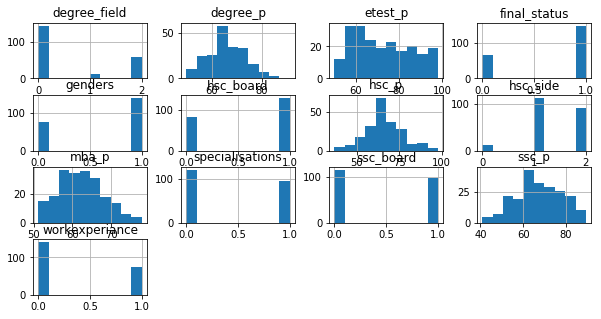

In [20]:
# now we plot a distribution of given data we find left and right skweness

data.hist(figsize=(10,5))

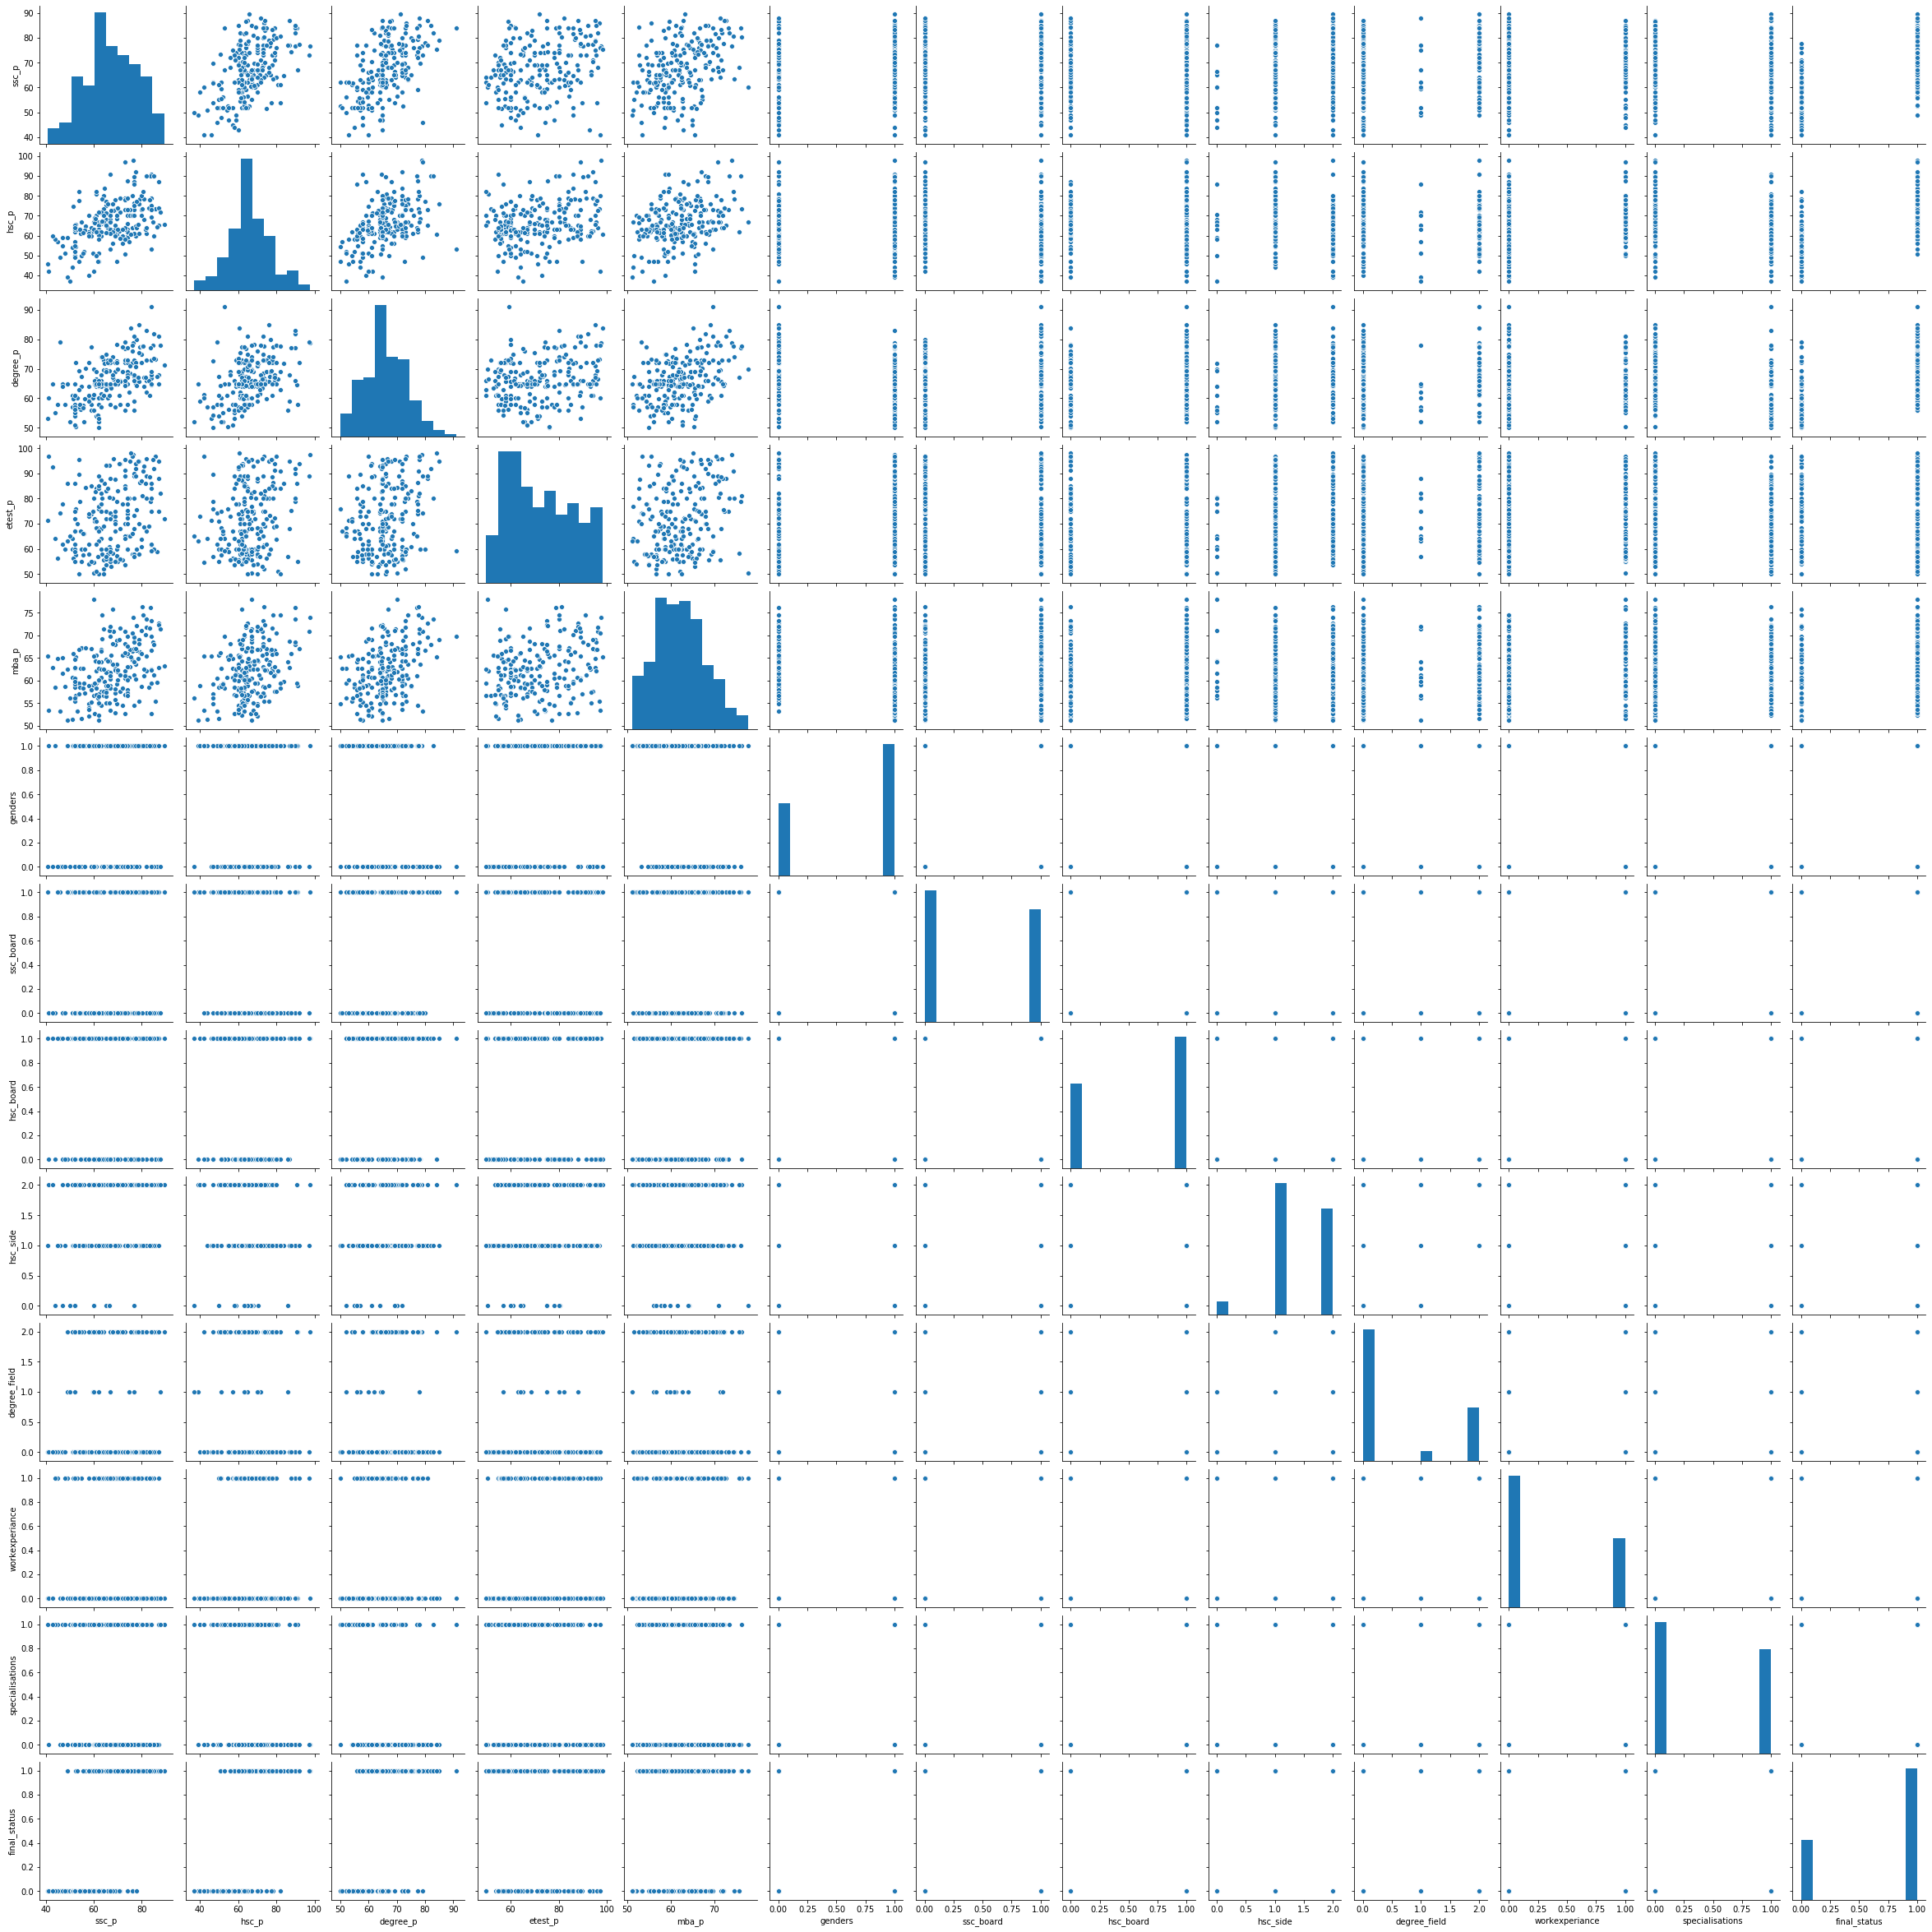

In [21]:
sns.pairplot(data)

In [22]:
data.corr()

# we are not showing any high positive correlation 

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations,final_status
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,-0.068969,0.116194,0.066996,0.236364,0.205896,0.175675,-0.172536,0.607889
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,-0.021334,-0.137013,-0.019548,-0.164091,-0.086450,0.141025,-0.241630,0.491228
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.173217,0.038070,0.067229,0.137276,0.079317,0.122648,-0.218286,0.479861
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.084294,-0.018991,0.039108,0.075643,0.011509,0.056735,-0.236315,0.127639
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,-0.300531,0.083120,0.090201,0.039345,0.116666,0.168811,-0.105728,0.076922
genders,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,1.000000,0.019429,0.065945,0.071827,0.061345,0.085153,-0.106160,0.090670
ssc_board,0.116194,-0.137013,0.038070,-0.018991,0.083120,0.019429,1.000000,0.605883,0.050919,0.100863,-0.040744,-0.051565,0.037297
hsc_board,0.066996,-0.019548,0.067229,0.039108,0.090201,0.065945,0.605883,1.000000,0.152227,0.057960,0.038357,0.002232,0.016945
hsc_side,0.236364,-0.164091,0.137276,0.075643,0.039345,0.071827,0.050919,0.152227,1.000000,0.596300,0.007856,0.172107,0.033442
degree_field,0.205896,-0.086450,0.079317,0.011509,0.116666,0.061345,0.100863,0.057960,0.596300,1.000000,0.105816,0.084361,-0.020352


In [23]:
data.cov()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations,final_status
ssc_p,117.228377,60.348373,42.897137,37.659225,24.535952,-0.357813,0.628523,0.354744,1.486815,1.984589,0.905789,-0.929872,3.055502
hsc_p,60.348373,118.755706,34.819820,35.461678,22.555846,-0.111400,-0.745949,-0.104179,-1.038893,-0.838682,0.731850,-1.310703,2.485149
degree_p,42.897137,34.819820,54.151103,21.929469,17.272020,-0.610775,0.139961,0.241942,0.586893,0.519607,0.429795,-0.799569,1.639311
etest_p,37.659225,35.461678,21.929469,176.251018,16.886973,0.536226,-0.125959,0.253911,0.583436,0.136019,0.358686,-1.561650,0.786670
mba_p,24.535952,22.555846,17.272020,16.886973,34.028376,-0.840037,0.242241,0.257325,0.133342,0.605860,0.468945,-0.306998,0.208311
genders,-0.357813,-0.111400,-0.610775,0.536226,-0.840037,0.229602,0.004651,0.015453,0.019996,0.026168,0.019431,-0.025321,0.020170
ssc_board,0.628523,-0.745949,0.139961,-0.125959,0.242241,0.004651,0.249598,0.148033,0.014779,0.044860,-0.009694,-0.012823,0.008650
hsc_board,0.354744,-0.104179,0.241942,0.253911,0.257325,0.015453,0.148033,0.239165,0.043251,0.025234,0.008933,0.000543,0.003847
hsc_side,1.486815,-1.038893,0.586893,0.583436,0.133342,0.019996,0.014779,0.043251,0.337535,0.308411,0.002173,0.049772,0.009020
degree_field,1.984589,-0.838682,0.519607,0.136019,0.605860,0.026168,0.044860,0.025234,0.308411,0.792523,0.044860,0.037383,-0.008411


#  firstly we use
# 1 random forest    
# 2 decision tree   
# 3 logistic regression 





# random forest

In [24]:
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations,final_status
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,1


In [25]:
x=data.drop("final_status" ,axis=1)
x

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,2,2,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0
211,58.00,60.00,72.00,74.0,53.62,1,1,1,2,2,0,0
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,1,0
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,1


In [26]:
y=data["final_status"]
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: final_status, Length: 215, dtype: int32

In [61]:
# train _test_split


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
x_train["ssc_p"].count()

172

In [65]:
x_test["ssc_p"].count()

43

In [67]:
from sklearn.ensemble import RandomForestClassifier
object= RandomForestClassifier(random_state=42,n_estimators=150)
object.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [70]:
predict=object.predict(x_test)
predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [71]:
from sklearn.metrics import classification_report
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.75      0.50      0.60        12\n           1       0.83      0.94      0.88        31\n\n    accuracy                           0.81        43\n   macro avg       0.79      0.72      0.74        43\nweighted avg       0.81      0.81      0.80        43\n'

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.813953488372093

# that nice score 81%

#  secoundly we use Decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
object1=DecisionTreeClassifier(random_state=42)

In [95]:
object1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [96]:
predict1=object1.predict(x_test)

In [97]:
predict1

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [98]:
accuracy_score(y_test,predict1)

0.8372093023255814

In [99]:
classification_report(y_test,predict1)

'              precision    recall  f1-score   support\n\n           0       0.69      0.75      0.72        12\n           1       0.90      0.87      0.89        31\n\n    accuracy                           0.84        43\n   macro avg       0.80      0.81      0.80        43\nweighted avg       0.84      0.84      0.84        43\n'

# score is  84% 

#  now we use logistic regression

In [102]:
from sklearn.linear_model import LogisticRegression
object2=LogisticRegression(  max_iter=170,random_state=42)


In [103]:
object2.fit(x_train,y_train)

C:\Users\Ani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=170,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
predict2=object2.predict(x_test)

In [105]:
predict2

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [111]:
accuracy_score(y_test,predict2)

0.8604651162790697

In [112]:
object2.score(x_test,y_test)

0.8604651162790697

#  the score is 86 

In [114]:
x_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations
93,52.00,62.0,54.0,72.00,55.41,1,0,0,1,0,0,1
84,70.00,63.0,70.0,55.00,62.00,1,0,1,2,2,1,0
95,73.00,78.0,65.0,95.46,62.16,1,0,1,1,0,1,0
137,67.00,63.0,72.0,56.00,60.41,1,1,0,1,0,0,1
210,80.60,82.0,77.6,91.00,74.49,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,61.08,50.0,54.0,71.00,65.69,1,1,1,2,2,0,0
14,62.00,47.0,50.0,76.00,54.96,1,0,0,1,0,0,1
92,60.23,69.0,66.0,72.00,59.47,0,0,0,2,0,0,0
179,77.80,64.0,64.2,75.50,72.14,0,0,0,2,2,0,1


In [117]:
object2.predict([[52,62,54,72,55.41,1,0,0,1,0,0,1]])

array([0])

In [118]:
x_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genders,ssc_board,hsc_board,hsc_side,degree_field,workexperiance,specialisations
200,69.00,60.00,65.00,87.55,52.81,1,1,1,1,0,0,0
212,67.00,67.00,73.00,59.00,69.72,1,1,1,1,0,1,0
138,82.00,64.00,73.00,96.00,71.77,0,1,1,2,2,1,0
176,59.00,60.00,56.00,55.00,57.90,0,0,1,1,0,0,1
15,65.00,75.00,69.00,72.00,64.66,0,0,0,1,0,1,0
111,51.00,54.00,61.00,60.00,60.64,1,1,1,2,2,0,1
168,48.00,51.00,58.00,60.00,58.79,0,0,0,1,0,1,1
73,64.60,83.83,71.72,86.00,59.75,1,0,1,1,0,0,0
204,74.00,73.00,73.00,80.00,67.69,0,1,1,1,0,1,0
139,77.00,70.00,59.00,58.00,54.43,1,0,0,1,0,1,0


In [119]:
object2.predict([[77,75,73,80,67.05,1,1,1,2,2,0,0]])

array([1])

In [120]:
y_test

200    1
212    1
138    1
176    1
15     1
111    0
168    0
73     1
204    1
139    1
158    0
30     1
186    0
9      0
67     1
175    0
171    1
18     0
153    1
66     1
185    1
142    1
79     0
25     0
104    1
145    1
189    0
16     1
45     0
150    1
108    1
55     1
112    1
191    1
124    1
128    1
75     0
135    1
118    1
98     1
96     1
183    1
117    1
Name: final_status, dtype: int32

# our logistic regresio model is best scoring model so we use this model
# for knowning that student are going to placed or not in future

# Thank you